# Пролонгация полисов

#### Выгрузим данные и посмотрим на них

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data.txt', sep = ';')

In [4]:
data.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


#### Итак в нашем распоряжении 30 характеристик, разберемся с каждой из них. С первыми двумя все ясно. Начнем с месяцев.

In [5]:
data['POLICY_BEGIN_MONTH'].value_counts()

8     14426
12    10475
4      9736
3      9282
10     8100
11     8048
9      6888
2      6525
5      6201
7      6141
6      5700
1      5083
Name: POLICY_BEGIN_MONTH, dtype: int64

In [6]:
data['POLICY_END_MONTH'].value_counts()

8     14394
12    10289
4      9497
3      9302
10     8125
11     7984
9      6991
2      6564
5      6287
7      6148
6      5717
1      5307
Name: POLICY_END_MONTH, dtype: int64

In [7]:
data[['POLICY_BEGIN_MONTH','POLICY_END_MONTH']].corr()

,POLICY_BEGIN_MONTH,POLICY_END_MONTH
POLICY_BEGIN_MONTH,1.000000,0.997728
POLICY_END_MONTH,0.997728,1.000000


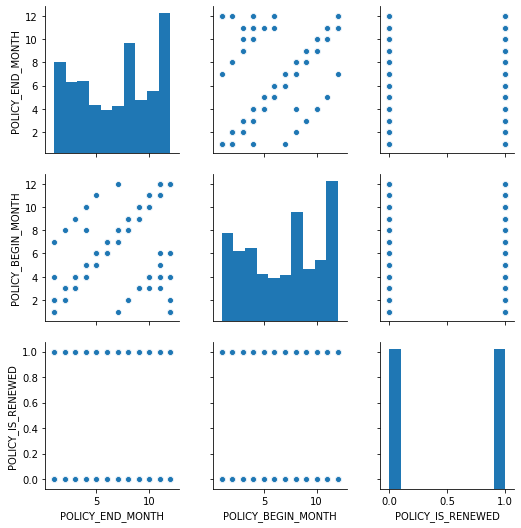

In [8]:
import seaborn as sns
sns.pairplot(data[['POLICY_END_MONTH','POLICY_BEGIN_MONTH','POLICY_IS_RENEWED']])

Данные сильно коррелируют, что логично, ведь обычно страховку оформляют на год, а значит месяц начала и окончания договора совпадают. Однако вряд ли  факт продления хоть как то зависит от месяца, это показывает и совместная диаграмма. Скорее он зависит от разницы этих величин. Возможно следует сократить эти параметры для 1 колонки.

#### Следующие параметры - канал продаж и группа каналов продаж

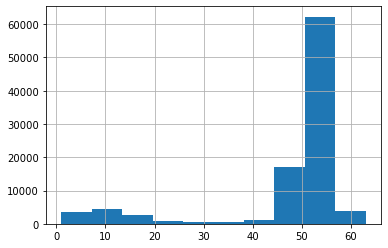

In [9]:
data['POLICY_SALES_CHANNEL'].hist()

In [10]:
data[['POLICY_SALES_CHANNEL_GROUP','POLICY_SALES_CHANNEL']].corr()

,POLICY_SALES_CHANNEL_GROUP,POLICY_SALES_CHANNEL
POLICY_SALES_CHANNEL_GROUP,1.000000,0.688423
POLICY_SALES_CHANNEL,0.688423,1.000000


Непонятные параметры, с ними нужно будет еще поэксперементировать

#### Филиал продажи   

In [11]:
data['POLICY_BRANCH'].value_counts()

Москва             50697
Санкт-Петербург    45908
Name: POLICY_BRANCH, dtype: int64

Тут все пока очевидно

#### Возраст и стаж вождения

In [12]:
data['POLICY_MIN_AGE'].describe()

count    96605.000000
mean        42.580767
std         10.694670
min         18.000000
25%         34.000000
50%         41.000000
75%         50.000000
max         86.000000
Name: POLICY_MIN_AGE, dtype: float64

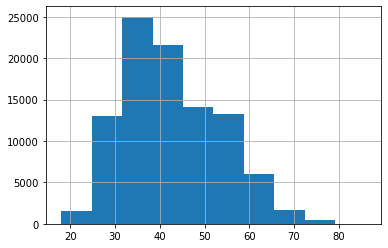

In [13]:
data['POLICY_MIN_AGE'].hist()

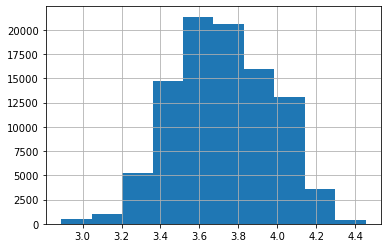

In [14]:
import math
data['POLICY_MIN_AGE'].map(lambda x: math.log(x)).hist()

Логнормальное распределение, без сюрпризов

In [15]:
data['POLICY_MIN_DRIVING_EXPERIENCE'].describe()

count    96605.000000
mean        34.910357
std        199.928966
min          0.000000
25%          8.000000
50%         14.000000
75%         19.000000
max       2015.000000
Name: POLICY_MIN_DRIVING_EXPERIENCE, dtype: float64

Ну тут конечно прикольно, 2015 лет стажа мне нравится. От греха подальше удалим такие бредовые строчки

In [16]:
data.drop(data.index[data['POLICY_MIN_DRIVING_EXPERIENCE'] > 150], inplace = True)

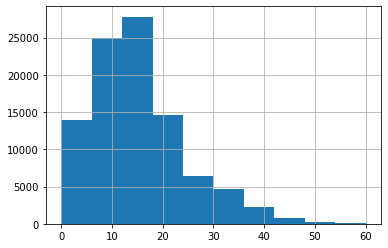

In [17]:
data['POLICY_MIN_DRIVING_EXPERIENCE'].hist()

Теперь все в порядке

#### Сам автомобиль. Марка, модель, мощность

In [18]:
data['VEHICLE_MODEL'].value_counts()

RAV4          4155
Sportage      3682
Duster        3597
Focus         3170
ix35          2945
              ... 
Safe             1
Fora (A21)       1
<Пусто>          1
3302             1
XK8              1
Name: VEHICLE_MODEL, Length: 546, dtype: int64

546 моделей. Переводить в бинарные значения многовато. Посмотрим топ

In [19]:
vc = data['VEHICLE_MODEL'].value_counts()
vc[vc>500]

RAV4                           4155
Sportage                       3682
Duster                         3597
Focus                          3170
ix35                           2945
Solaris                        2774
Outlander                      2584
Qashqai                        2532
Ceed                           2454
Kuga                           2058
Rio                            1989
ASX                            1977
Tiguan                         1774
Santa Fe                       1553
CR-V                           1213
X3                             1208
Octavia                        1195
Juke                           1185
X-Trail                        1151
Sorento                        1142
Grand Vitara                   1123
X1                             1055
Sandero                         919
Rapid                           905
Land Cruiser Prado              896
Fabia                           845
Yeti                            842
Megane                      

In [20]:
data['VEHICLE_ENGINE_POWER'].describe()

count    95613.000000
mean       154.224166
std         54.224184
min          0.000000
25%        123.000000
50%        146.000000
75%        171.000000
max       2000.000000
Name: VEHICLE_ENGINE_POWER, dtype: float64

По мощности тут тоже гигантские выбросы. 2000 ЛС конечно такие машины существуют, но что-то я сомневаюсь что в этих данных. Посмотрим что это за машины

In [21]:
data[data['VEHICLE_ENGINE_POWER']>1000][['VEHICLE_MODEL','VEHICLE_ENGINE_POWER']]

,VEHICLE_MODEL,VEHICLE_ENGINE_POWER
87766,XC90,2000.0
90318,RAV4,1148.0


Ну эта вольво и эта тойота вряд ли имеют такую мощность. Я снова за удаление этих столбцов

In [22]:
data.drop(data.index[data['VEHICLE_ENGINE_POWER'] > 1000], inplace = True)

#### ТС куплено в кредит

In [23]:
data['VEHICLE_IN_CREDIT'].value_counts()

0    64987
1    30624
Name: VEHICLE_IN_CREDIT, dtype: int64

#### Стоимость ТС - важнейший параметр

In [24]:
pd.set_option('float_format', '{:f}'.format)
data['VEHICLE_SUM_INSURED'].describe()

count     95611.000000
mean     977536.084517
std      688480.176896
min           0.000000
25%      557000.000000
50%      806850.000000
75%     1158022.500000
max     9449000.000000
Name: VEHICLE_SUM_INSURED, dtype: float64

Нулевая стоимость. Наверное такое возможно, однако интересно посмотреть

In [25]:
data[data['VEHICLE_SUM_INSURED']==0][['VEHICLE_MODEL','VEHICLE_ENGINE_POWER', 'POLICY_MIN_AGE', 'POLICY_IS_RENEWED', 'POLICY_DEDUCT_VALUE']]

,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,POLICY_MIN_AGE,POLICY_IS_RENEWED,POLICY_DEDUCT_VALUE
3646,Outlander,170.000000,65,1,10000.000000
9397,RAV4,152.000000,38,0,10000.000000
15650,Grand Vitara,169.000000,41,1,0.000000
19775,Forester,150.000000,43,0,30000.000000
20559,Grand Vitara,140.000000,57,1,0.000000
20763,Touareg,249.000000,41,0,0.000000
21597,QX70,333.000000,43,1,20000.000000
23959,Qashqai,114.000000,31,1,15000.000000
28295,CX-5,150.000000,34,0,0.000000
31024,Outlander XL,146.000000,49,1,0.000000


Таких машин довольно много, что это значит я не знаю, но на факт продления это влияет не напрямую, поэтому оставим как есть.

####  Убытки, жалобы, штрафы

In [26]:
data['POLICY_CLM_N'].value_counts()

0      67407
1S      9961
1L      9818
2       6107
3       1688
4+       574
n/d       56
Name: POLICY_CLM_N, dtype: int64

In [27]:
data['POLICY_CLM_GLT_N'].value_counts()

0      71556
1S      9912
1L      7633
2       4854
3       1189
4+       411
n/d       56
Name: POLICY_CLM_GLT_N, dtype: int64

In [28]:
data['POLICY_PRV_CLM_N'].value_counts()

0     44583
N     32317
1S     7259
1L     6790
2      3746
3       788
4+      128
Name: POLICY_PRV_CLM_N, dtype: int64

In [29]:
data['POLICY_PRV_CLM_GLT_N'].value_counts()

0     48149
N     32317
1S     7303
1L     4852
2      2572
3       358
4+       60
Name: POLICY_PRV_CLM_GLT_N, dtype: int64

Нан значений нет. Смысл этих сокращений мне не понятин. Придется просто переводить в бинарные значения

In [30]:
data['CLIENT_HAS_DAGO'].value_counts()

0    68934
1    26677
Name: CLIENT_HAS_DAGO, dtype: int64

In [31]:
data['POLICY_COURT_SIGN'].value_counts()

0    95513
1       98
Name: POLICY_COURT_SIGN, dtype: int64

In [32]:
data[data['POLICY_COURT_SIGN']==1]['POLICY_IS_RENEWED'].value_counts()

0    91
1     7
Name: POLICY_IS_RENEWED, dtype: int64

Логично, что если по полису был суд, то скорее всего полис не продлят

In [33]:
data['CLAIM_AVG_ACC_ST_PRD'].describe()

count   95611.000000
mean        3.889444
std        17.685962
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       737.000000
Name: CLAIM_AVG_ACC_ST_PRD, dtype: float64

Видимо в основном, все сразу сообщают о страховом случае

In [34]:
data[data['POLICY_HAS_COMPLAINTS']==1]['POLICY_IS_RENEWED'].value_counts()

0    452
1    282
Name: POLICY_IS_RENEWED, dtype: int64

Тут же, не всегда жалобы клиентов означают то что полис не будет продлен. Видимо в компании хорошо умеют общаться с клиентами и решать их вопросы

####  Количество лет пролонгации - наверное самый важный параметр

In [35]:
data['POLICY_YEARS_RENEWED_N'].value_counts()

0     32261
1     25296
2     15276
3     11495
4      6215
5      2228
6      1748
7       832
8       104
9        82
N        56
10       18
Name: POLICY_YEARS_RENEWED_N, dtype: int64

N - видимо больше 10

<BarContainer object of 12 artists>

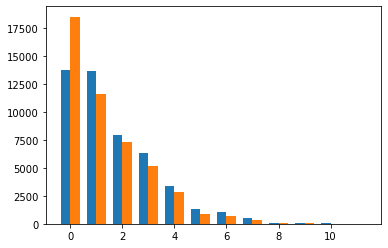

In [36]:
import matplotlib.pyplot as plt
import numpy as np
labels = data['POLICY_YEARS_RENEWED_N'].unique()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.bar(x - width/2, data[data['POLICY_IS_RENEWED']==1]['POLICY_YEARS_RENEWED_N'].value_counts(), width)
plt.bar(x + width/2, data[data['POLICY_IS_RENEWED']==0]['POLICY_YEARS_RENEWED_N'].value_counts(), width)

Очевидной закономерности нет, однако видно что после 1 года пролонгации вероятность последующей пролонгации выше.

#### Сумма фрашизы по полюсу

In [37]:
data['POLICY_DEDUCT_VALUE'].describe()

count    95611.000000
mean      5924.762984
std      10384.579470
min          0.000000
25%          0.000000
50%          0.000000
75%      10000.000000
max     120873.000000
Name: POLICY_DEDUCT_VALUE, dtype: float64

#### Регион клиента

In [38]:
data['CLIENT_REGISTRATION_REGION'].value_counts()

Санкт-Петербург             38447
Москва                      34095
Московская                  12679
Ленинградская                5796
N                            1121
                            ...  
Алтай                           2
Магаданская                     2
Северная Осетия - Алания        2
Приморский                      1
Чукотский                       1
Name: CLIENT_REGISTRATION_REGION, Length: 85, dtype: int64

Приличное количество значений. Кроме того присутствует нан значение, и оно довольно популярно

#### Изменения цены - тоже важный параметр

In [39]:
data['POLICY_PRICE_CHANGE'].describe()

count   95611.000000
mean       -0.032309
std         0.861957
min        -1.000000
25%        -0.170000
50%         0.000000
75%         0.050000
max        60.020000
Name: POLICY_PRICE_CHANGE, dtype: float64

## Построение модели

Итак, очевидных зависимостей или аномалий не найдено. Задача - довольно классическая. Оптимальный вариант решения - градиентный бустинг. Для этого:
 - уберем все TEST типы данных, они все равно обнулены
 - удалим ненужные поля (айди полиса, айди посредника, марка (все равно модель уникальна), группа канала (все равно только для группировки))
 - разделим получившуюся выборку на тестовую и тренировочную подвыборки
 - избавимся от уникальных значений. 


#### Удалим тестовые строки и ненужные стобцы

In [40]:
data.drop(data.index[data['DATA_TYPE'] == 'TEST '], inplace = True)

In [41]:
drops = ['DATA_TYPE','POLICY_ID', 'POLICY_SALES_CHANNEL_GROUP', 'POLICY_INTERMEDIARY', 'VEHICLE_MAKE']
data.drop(labels = drops, axis = 1, inplace = True)

In [42]:
data.head()

,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,1,1,1,39,Москва,51,12,Discovery,245.000000,0,...,N,1,0,0,0.000000,0,0,0.000000,Тульская,-1.000000
1,1,1,1,50,Москва,35,7,Zafira,140.000000,0,...,0,1,1,0,0.000000,0,4,0.000000,Москва,-0.050000
2,1,1,1,52,Москва,41,6,Soul,129.000000,0,...,1L,0,0,0,0.000000,0,1,12518.000000,Московская,-0.070000
3,1,1,1,50,Москва,36,12,C-Crosser,170.000000,0,...,0,1,1,0,0.000000,0,6,15000.000000,Москва,0.050000
4,1,1,0,52,Санкт-Петербург,42,5,Logan,102.000000,0,...,N,0,0,0,0.000000,0,0,50000.000000,Ленинградская,0.170000


#### Вычтем месяцы

In [43]:
data['POLICY_BEGIN_MONTH'] = data['POLICY_END_MONTH']-data['POLICY_BEGIN_MONTH']

In [44]:
data['POLICY_BEGIN_MONTH'].value_counts()

 0     74727
-1      1840
 6        13
-6         6
 7         6
 11        4
 8         3
-3         1
-4         1
-5         1
 5         1
Name: POLICY_BEGIN_MONTH, dtype: int64

In [45]:
data['POLICY_BEGIN_MONTH'] = data['POLICY_BEGIN_MONTH'].map(lambda x: 'N' if (x!=0 and x!=-1) else x)

In [46]:
data['POLICY_BEGIN_MONTH'].value_counts()

0     74727
-1     1840
N        36
Name: POLICY_BEGIN_MONTH, dtype: int64

In [47]:
del data['POLICY_END_MONTH']

#### Избавимся от уникальных значений

Поля модели машин и региона клиента содержат много уникальных значений. Выделим только топ значений, остальные, включая НАН переведем в отдельный тип.

In [48]:
g = data.groupby('VEHICLE_MODEL')
data.loc[g['VEHICLE_MODEL'].transform(lambda x: len(x) <= 601).astype(bool), 'VEHICLE_MODEL'] = 'RARE'

In [49]:
data['VEHICLE_MODEL'].value_counts()

RARE                  33929
RAV4                   3337
Sportage               2952
Duster                 2897
Focus                  2537
ix35                   2373
Solaris                2224
Outlander              2105
Qashqai                2034
Ceed                   1987
Kuga                   1607
Rio                    1572
ASX                    1563
Tiguan                 1452
Santa Fe               1226
X3                      980
CR-V                    956
Octavia                 951
Juke                    951
X-Trail                 923
Grand Vitara            910
Sorento                 901
X1                      820
Sandero                 739
Land Cruiser Prado      720
Rapid                   717
Fabia                   686
Yeti                    684
Megane                  644
Logan                   621
Fluence                 605
Name: VEHICLE_MODEL, dtype: int64

In [50]:
g = data.groupby('CLIENT_REGISTRATION_REGION')
data.loc[g['CLIENT_REGISTRATION_REGION'].transform(lambda x: len(x) <= 500).astype(bool), 'CLIENT_REGISTRATION_REGION'] = 'RARE'

In [51]:
data['CLIENT_REGISTRATION_REGION'].value_counts()

Санкт-Петербург    30793
Москва             27360
Московская         10184
Ленинградская       4598
RARE                2776
N                    892
Name: CLIENT_REGISTRATION_REGION, dtype: int64

In [52]:
data = pd.get_dummies(data, columns=['POLICY_BEGIN_MONTH', "POLICY_BRANCH", "INSURER_GENDER", 'POLICY_CLM_GLT_N', 'POLICY_PRV_CLM_N', 'POLICY_PRV_CLM_GLT_N', 'CLIENT_REGISTRATION_REGION', 'POLICY_CLM_N', 'VEHICLE_MODEL', 'POLICY_YEARS_RENEWED_N'])

In [53]:
data.columns

Index(['POLICY_IS_RENEWED', 'POLICY_SALES_CHANNEL', 'POLICY_MIN_AGE',
       'POLICY_MIN_DRIVING_EXPERIENCE', 'VEHICLE_ENGINE_POWER',
       'VEHICLE_IN_CREDIT', 'VEHICLE_SUM_INSURED', 'CLIENT_HAS_DAGO',
       'CLIENT_HAS_OSAGO', 'POLICY_COURT_SIGN', 'CLAIM_AVG_ACC_ST_PRD',
       'POLICY_HAS_COMPLAINTS', 'POLICY_DEDUCT_VALUE', 'POLICY_PRICE_CHANGE',
       'POLICY_BEGIN_MONTH_-1', 'POLICY_BEGIN_MONTH_0', 'POLICY_BEGIN_MONTH_N',
       'POLICY_BRANCH_Москва', 'POLICY_BRANCH_Санкт-Петербург',
       'INSURER_GENDER_F', 'INSURER_GENDER_M', 'POLICY_CLM_GLT_N_0',
       'POLICY_CLM_GLT_N_1L', 'POLICY_CLM_GLT_N_1S', 'POLICY_CLM_GLT_N_2',
       'POLICY_CLM_GLT_N_3', 'POLICY_CLM_GLT_N_4+', 'POLICY_CLM_GLT_N_n/d',
       'POLICY_PRV_CLM_N_0', 'POLICY_PRV_CLM_N_1L', 'POLICY_PRV_CLM_N_1S',
       'POLICY_PRV_CLM_N_2', 'POLICY_PRV_CLM_N_3', 'POLICY_PRV_CLM_N_4+',
       'POLICY_PRV_CLM_N_N', 'POLICY_PRV_CLM_GLT_N_0',
       'POLICY_PRV_CLM_GLT_N_1L', 'POLICY_PRV_CLM_GLT_N_1S',
       'POLICY_PR

In [61]:
parametres = {}
for i in data.columns:
    parametres[i] = {'max':data[i].max(), 'min': data[i].min()}
parametres

{'POLICY_IS_RENEWED': {'max': 1, 'min': 0},
 'POLICY_SALES_CHANNEL': {'max': 63, 'min': 1},
 'POLICY_MIN_AGE': {'max': 86, 'min': 18},
 'POLICY_MIN_DRIVING_EXPERIENCE': {'max': 60, 'min': 0},
 'VEHICLE_ENGINE_POWER': {'max': 626.0, 'min': 0.0},
 'VEHICLE_IN_CREDIT': {'max': 1, 'min': 0},
 'VEHICLE_SUM_INSURED': {'max': 9449000.0, 'min': 0.0},
 'CLIENT_HAS_DAGO': {'max': 1, 'min': 0},
 'CLIENT_HAS_OSAGO': {'max': 1, 'min': 0},
 'POLICY_COURT_SIGN': {'max': 1, 'min': 0},
 'CLAIM_AVG_ACC_ST_PRD': {'max': 737.0, 'min': 0.0},
 'POLICY_HAS_COMPLAINTS': {'max': 1, 'min': 0},
 'POLICY_DEDUCT_VALUE': {'max': 120873.0, 'min': 0.0},
 'POLICY_PRICE_CHANGE': {'max': 60.02, 'min': -1.0},
 'POLICY_BEGIN_MONTH_-1': {'max': 1, 'min': 0},
 'POLICY_BEGIN_MONTH_0': {'max': 1, 'min': 0},
 'POLICY_BEGIN_MONTH_N': {'max': 1, 'min': 0},
 'POLICY_BRANCH_Москва': {'max': 1, 'min': 0},
 'POLICY_BRANCH_Санкт-Петербург': {'max': 1, 'min': 0},
 'INSURER_GENDER_F': {'max': 1, 'min': 0},
 'INSURER_GENDER_M': {'max': 

### Обучение

In [221]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [239]:
y_train = data['POLICY_IS_RENEWED']
x_train = data.drop('POLICY_IS_RENEWED', axis = 1)

In [240]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [241]:
x_train

array([[0.61290323, 0.48529412, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.79032258, 0.25      , 0.11666667, ..., 0.        , 0.        ,
        0.        ],
       [0.82258065, 0.33823529, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79032258, 0.60294118, 0.51666667, ..., 0.        , 0.        ,
        0.        ],
       [0.82258065, 0.33823529, 0.31666667, ..., 0.        , 0.        ,
        0.        ],
       [0.85483871, 0.11764706, 0.11666667, ..., 0.        , 0.        ,
        0.        ]])

In [242]:
state = 12  
test_size = 0.2 
  
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,  
    test_size=test_size, random_state=state)

In [228]:
gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.5, max_features=16, max_depth=4, random_state=0)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=4,
                           max_features=16, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [229]:
gb_clf.score(x_train, y_train)

0.724641703673799

In [231]:
gb_clf.score(x_val, y_val)

0.6962050867985466

In [232]:
gb_clf.predict_proba(x_val)

array([[0.88166041, 0.11833959],
       [0.29188728, 0.70811272],
       [0.33696301, 0.66303699],
       ...,
       [0.91988988, 0.08011012],
       [0.54369801, 0.45630199],
       [0.27807465, 0.72192535]])

In [234]:
from sklearn.neural_network import MLPClassifier

In [235]:
len(data.columns)

98

In [252]:
clf = MLPClassifier( hidden_layer_sizes=(98, 98), verbose = 1, random_state=1, learning_rate_init=0.001)

In [253]:
clf.fit(x_train, y_train)

Iteration 1, loss = 0.62593905
Iteration 2, loss = 0.61791611
Iteration 3, loss = 0.61529982
Iteration 4, loss = 0.61251643
Iteration 5, loss = 0.61016970
Iteration 6, loss = 0.60802828
Iteration 7, loss = 0.60555589
Iteration 8, loss = 0.60328969
Iteration 9, loss = 0.60127212
Iteration 10, loss = 0.59902358
Iteration 11, loss = 0.59619132
Iteration 12, loss = 0.59421081
Iteration 13, loss = 0.59148857
Iteration 14, loss = 0.58919619
Iteration 15, loss = 0.58668804
Iteration 16, loss = 0.58463370
Iteration 17, loss = 0.58177180
Iteration 18, loss = 0.57999574
Iteration 19, loss = 0.57753327
Iteration 20, loss = 0.57530722
Iteration 21, loss = 0.57298254
Iteration 22, loss = 0.57032661
Iteration 23, loss = 0.56830305
Iteration 24, loss = 0.56599962
Iteration 25, loss = 0.56399059
Iteration 26, loss = 0.56176995
Iteration 27, loss = 0.55943114
Iteration 28, loss = 0.55765054
Iteration 29, loss = 0.55501211
Iteration 30, loss = 0.55321652
Iteration 31, loss = 0.55112170
Iteration 32, los

c:\users\alexander\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(98, 98), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [256]:
clf.score(x_train, y_train)

MemoryError: Unable to allocate array with shape (61282, 98) and data type float64

In [255]:
clf.score(x_val, y_val)

0.6160172312512238